# 01. Initial Studies: New Alresford, Milton Keynes, Amsterdam

*16 Aug 2020*

*2 Sep 2020, updated*

Initial studies to check that the proposed `geometries` module does convert OpenStreetMap

- nodes
- ways
- multipolygon relations

to Shapely

- Points
- LineStrings
- Polygons
- MultiPolygons.

In [1]:
%load_ext autoreload
%autoreload 2

import osmnx as ox # using fork `New geometries module - Work In Progress`
ox.utils.config(use_cache=True, log_console=True)

import matplotlib.pyplot as plt

## New Alresford, Hampshire
***https://www.openstreetmap.org/#map=15/51.0864/-1.1649***

- Small size
- Good mix of land uses (Polygons and MultiPolygons)
- Highways, railways and waterways (LineStrings)
- Amenities and highway turning heads (Points)
- High proportion of cul-de-sacs (few roundabouts, doesn't check conversion of closed ways to LineStrings)

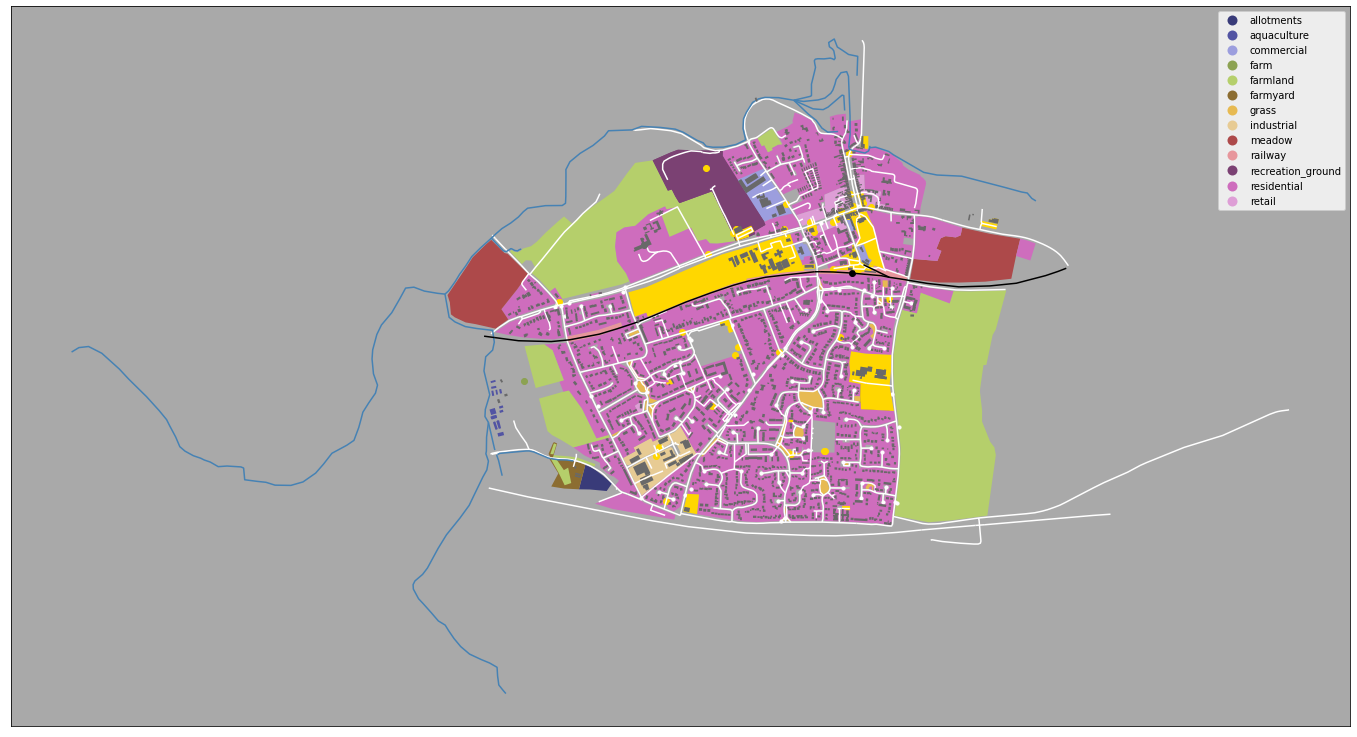

In [2]:
# New geometries module
Alr = ox.geometries_from_place('New Alresford, Hampshire', tags={'amenity': True, 'highway':True, 'landuse':True, 'building':True, 'waterway': True, 'railway': True})

# Presentation code
Alr.to_crs(epsg=27700, inplace=True)

fig,ax = plt.subplots(figsize=(24,24))
Alr[Alr['landuse'].notna()].plot(ax=ax, column='landuse', cmap='tab20b', legend=True)
Alr[Alr['highway'].notna()].plot(ax=ax, color='white', markersize=10)
Alr[Alr['waterway'].notna()].plot(ax=ax, color='steelblue')
Alr[Alr['railway'].notna()].plot(ax=ax, color='black')
Alr[Alr['building'].notna()].plot(ax=ax, color='dimgrey', zorder=3)
Alr[Alr['amenity'].notna()].plot(ax=ax, color='gold')
ax.set_facecolor('darkgrey')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

## Milton Keynes
***https://www.openstreetmap.org/#map=15/52.0407/-0.7604***

- high number of roundabouts (closed ways that should convert to LineStrings)
- closed ways (e.g. roundabouts) are converted to LineStrings if tagged appropriately (e.g. `highway`).
- closed ways tagged as `highway` are also converted to Polygons when additionally tagged with `area:yes`.

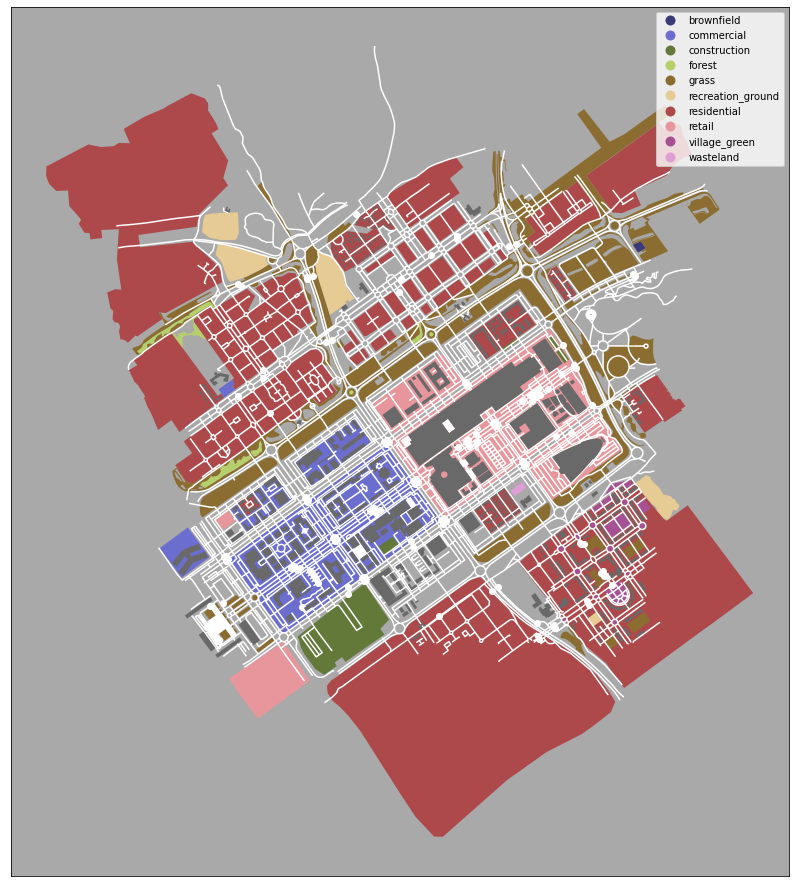

In [3]:
# New geometries module
MK = ox.geometries_from_point((52.0430,-0.7590), dist=1000, tags={'highway':True, 'landuse':True, 'building':True})

# Presentation code
MK.to_crs(epsg=27700, inplace=True)

fig,ax = plt.subplots(figsize=(16,16))
MK[MK['landuse'].notna()].plot(ax=ax, column='landuse', cmap='tab20b', legend=True)
MK[MK['highway'].notna()].plot(ax=ax, color='white')
MK[MK['building'].notna()].plot(ax=ax, color='dimgrey', zorder=3)
ax.set_facecolor('darkgrey')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

## Amsterdam
***https://www.openstreetmap.org/#map=11/52.3827/4.8354***

- check conversion to Polygons and MultiPolygons

<AxesSubplot:>

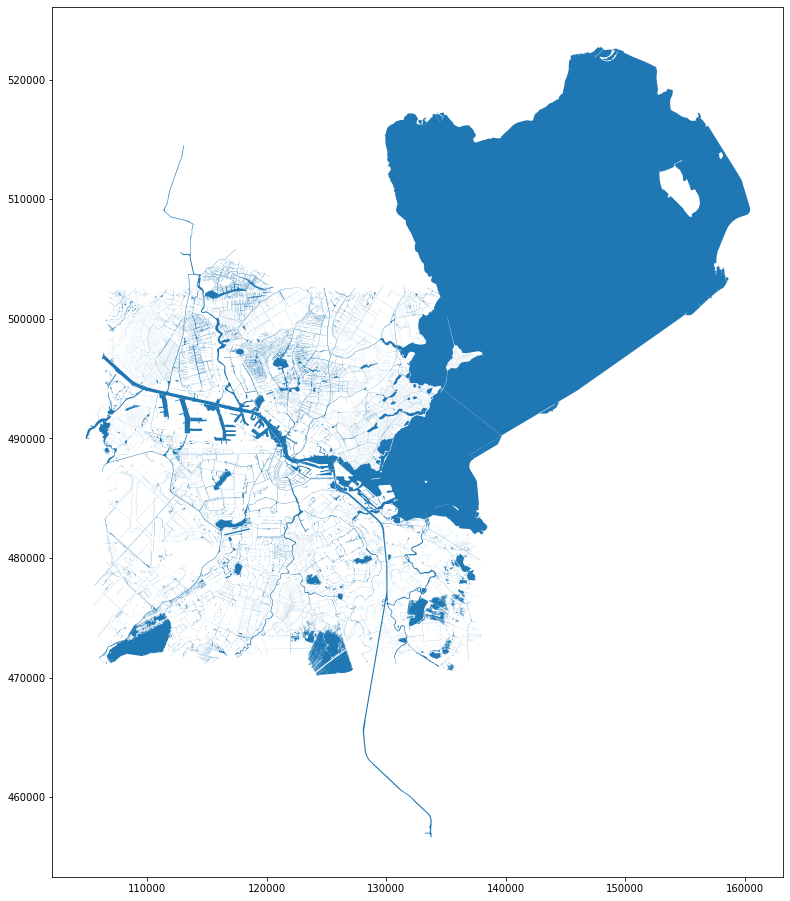

In [4]:
Amsterdam = ox.geometries_from_point((52.3716,4.9005), dist=15000, tags={'natural':'water'})
Amsterdam.to_crs(epsg=28992, inplace=True)
Amsterdam.plot(figsize=(16,16))